In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
from sqlalchemy import Column, Integer, String, Float, DateTime, Boolean, func
from iotfunctions import base
from iotfunctions import bif
from iotfunctions.metadata import EntityType
from iotfunctions.db import Database
from iotfunctions.enginelog import EngineLogging
from iotfunctions import estimator
import datetime as dt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/home/markus/.local/lib/python3.7/site-packages/iotfunctions/bif.py:1899: UserWarning: IoTCalcSettings is deprecated. Use entity type constants instead of a metadata provider to set entity type properties
  warnings.warn(('IoTCalcSettings is deprecated. Use entity type constants'


In [2]:
credentials = {
  "tenantId": "AnalyticsServiceDev",
  "as_api_host": "https://api-dev.connectedproducts.internetofthings.ibmcloud.com",
  "as_api_key": "a-69xgm4-8bdgtvnsv4",
  "as_api_token": "9X_tMKdupOiJ!mzaPV",
  "db2": {
    "username": "bluadmin",
    "password": "ZmM5MmE5NmZkZGZl",
    "databaseName": "BLUDB",
    "port": 50000,
    "httpsUrl": "https://dashdb-enterprise-yp-dal13-74.services.dal.bluemix.net:50000",
    "host": "dashdb-enterprise-yp-dal13-74.services.dal.bluemix.net"
  }
}

In [3]:
db_schema = None
db = Database(credentials=credentials)

/home/markus/.local/lib/python3.7/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [4]:
table = db.get_table("IOT_SIVASENSORTYPE1")
start_ts = dt.datetime.utcnow() - dt.timedelta(days=1)
end_ts = dt.datetime.utcnow()
df = db.read_table(table, None, None, None, "publishedtime", start_ts, end_ts)

/home/markus/.local/lib/python3.7/site-packages/ibm_db_sa/reflection.py:255: SAWarning: Did not recognize type 'BOOLEAN' of column 'STATUS'
  (coltype, r[0]))


AttributeError: 'Table' object has no attribute 'head'

In [17]:
df.shape

(6963, 13)

In [16]:
df.describe()

,temperature,humidity,ecount,pressure
count,6963.000000,6963.000000,6963.000000,6963.000000
mean,90.019101,30.507302,29.495763,65.261899
std,17.547123,11.886040,16.742437,8.976869
min,60.000000,10.004322,1.000000,50.003117
25%,75.000000,20.239794,15.000000,57.415373
50%,90.000000,30.495989,29.000000,65.091460
75%,105.000000,40.768938,44.000000,72.995135
max,120.000000,50.993107,58.000000,80.997826


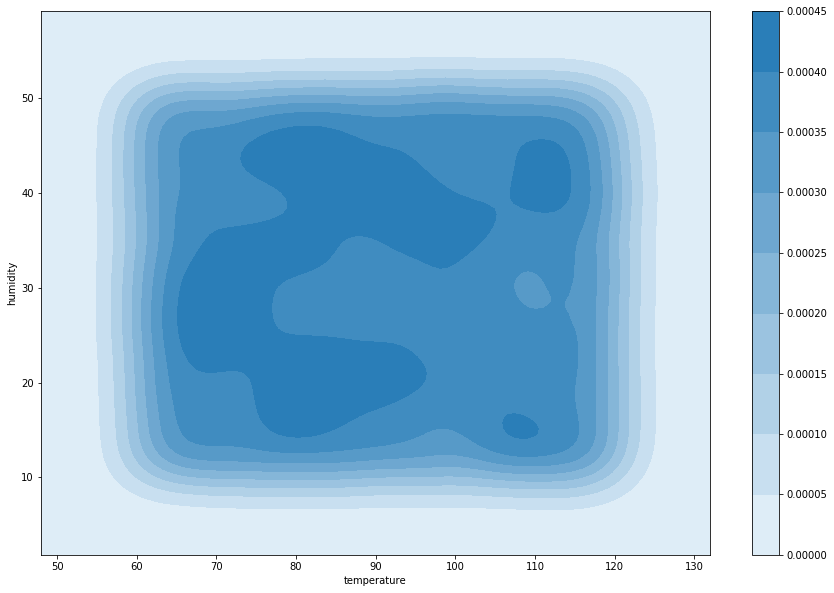

In [37]:
plt.figure(figsize=(15,10))
#plt.tight_layout()
seabornInstance.kdeplot(df['temperature'], df['humidity'], shade = True, n_levels=10, cbar=True)

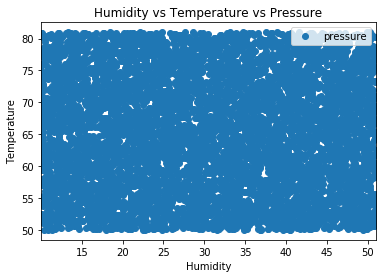

In [9]:
dfsub = df[['humidity','pressure']]
dfsub.plot(x='humidity', y='pressure', style='o')  
plt.title('Humidity vs Temperature vs Pressure')  
plt.xlabel('Humidity')  
plt.ylabel('Temperature')  
plt.show()